In [63]:
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Flatten, concatenate
from keras.utils import Sequence

import keras
import numpy as np

# Define The Model

We define the model as two inputs with each sprite, and with the expected
middle frame that's supposed to be generated as output.

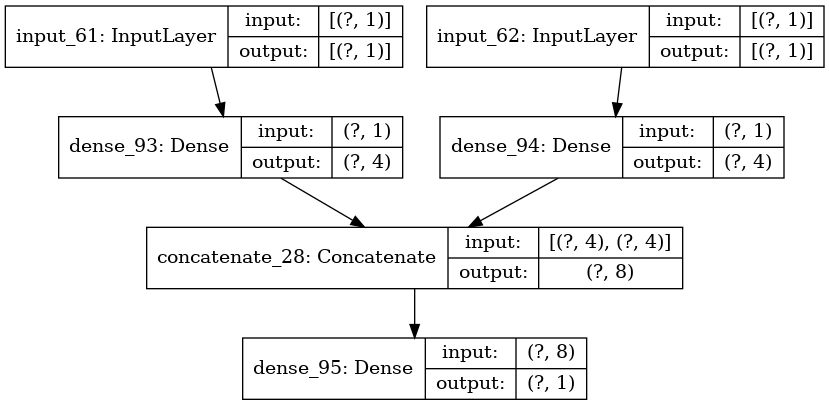

In [70]:
# the first branch deals with the first sprite
start_frame_input = keras.Input(shape=(1))
first_frame = Dense(4, activation="relu")(start_frame_input)

# the second branch deals with the 2nd sprite
end_frame_input = keras.Input(shape=(1))
end_frame = Dense(4, activation="relu")(end_frame_input)

both_frames = concatenate([first_frame, end_frame])

out = Dense(1, activation="relu")(both_frames)

model = Model(inputs=[start_frame_input, end_frame_input],
              outputs=out)

model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

## Data Generation

In [71]:
class MultipleInputGenerator(Sequence):
    """Wrapper of 2 ImageDataGenerator"""

    def __len__(self):
        """It is mandatory to implement it on Keras Sequence"""
        return 100

    def __getitem__(self, index):
        """Getting items from the 2 generators and packing them"""
        Y_batch = np.array([1])
        X1_batch = np.array([1])
        X2_batch = np.array([1])

        X_batch = [X1_batch, X2_batch]

        return X_batch, Y_batch

model.fit(
    MultipleInputGenerator(),
    epochs=10,
)

Epoch 1/10
100/100 [==============================] - 0s 609us/step - loss: 15.4249 - accuracy: 0.0000e+00
Epoch 2/10
100/100 [==============================] - 0s 538us/step - loss: 15.4249 - accuracy: 0.0000e+00
Epoch 3/10
100/100 [==============================] - 0s 557us/step - loss: 15.4249 - accuracy: 0.0000e+00
Epoch 4/10
100/100 [==============================] - 0s 550us/step - loss: 15.4249 - accuracy: 0.0000e+00